## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 19.09.2023

Мягкий дедлайн: 23:59MSK 02.10.2023

Жесткий дедлайн: 23:59MSK 06.10.2023

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после жёсткого дедлайна нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно получить у семинариста или ассистента. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 11.

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода.

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*.

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [1066]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [1067]:
# your code

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб?

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [1068]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


<span style="color:red">Перед выполнением задания необходимо ознакомиться с первым семинаром (seminars/sem01-pandas.ipynb) </span>.

Это поможет вам получить общее понимание происходяшего и успешнее справиться с заданием.

Также успешному выполнению способствует внимательное чтение текста задания от начала до конца.

Удачи!

Скачаем подготовленные на семинаре данные:

In [1069]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [1070]:
# !powershell iwr -outf somefile https://somesite/somefile

In [1071]:
# !pip install wget
# import wget
# wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [1072]:
# your code
data = pd.read_excel('end_seminar.xlsx')

data.tail(10)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
351,2020-05-18 23:58:33.903,8fe79f84f36e3a5d2d6745621321302c,1016,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Проектирование и разработка высоконагруженных ...,Символьные вычисления,Да,0.942029,174.0,DevOps,NaN
352,2020-05-18 23:59:20.831,f93afd8e92c336b471aa3bbbc579aefe,1298,NaN,NaN,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Методы сжатия и передачи медиаданных,Проектирование и разработка высоконагруженных ...,Конфликты и кооперация,Да,0.057971,175.0,DevOps,NaN
353,2020-05-18 23:59:28.998,9963fc00d9405a35b894cc04a7e19855,1135,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Безопасность компьютерных систем,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Символьные вычисления,Да,0.572464,175.0,DevOps,NaN
354,2020-05-19 08:55:39.509,98c5a2548d93f26bd4195466e93178b3,1035,NaN,NaN,Байесовские методы машинного обучения,Глубинное обучение в обработке звука,Statistical Learning Theory,Обучение с подкреплением,Генеративные модели в машинном обучении,Методы сжатия и передачи медиаданных,Нет,0.905797,171.0,DevOps,NaN
355,2020-05-19 18:58:06.283,ba298cbd9be59b84bab33325e956f27e,1155,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Байесовские методы машинного обучения,Анализ неструктурированных данных,Конфликты и кооперация,Обучение с подкреплением,Компьютерное зрение,Да,0.507246,171.0,Соревновательный анализ данных,NaN
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,NaN,NaN,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,NaN,0.369565,176.0,Соревновательный анализ данных,NaN


#### 2. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [1073]:
# your code
is_empty = data.isna().any().any()
empty_info = data.isna().sum()
print('Есть пустые ячейки:', is_empty)

empty_info = empty_info[empty_info > 0]
if is_empty:
    print('Название колонки', '  ', 'количество попусков')
    print(empty_info)

Есть пустые ячейки: True
Название колонки    количество попусков
18_group         138
is_mi            343
is_first_time      2
17_group         223
blended          223
is_ml_student    304
dtype: int64


Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [1074]:
# your code
str_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(exclude=['object']).columns

data[str_cols] = data[str_cols].fillna('')
data[num_cols] = data[num_cols].fillna(0)

is_empty = data.isna().any().any()
print('Есть пустые ячейки:', is_empty)

Есть пустые ячейки: False


#### 3. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'.

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [1075]:
# your code
student_said_no = data[data['is_first_time'] == 'Нет']['is_first_time'].count()
student_said_yes = data[data['is_first_time'] == 'Да']['is_first_time'].count()
print('Первичное знаение ответов "нет":', student_said_no)
print('Первичное знаение ответов "да":', student_said_yes)

data = data.drop_duplicates(subset=['id'], keep='last')

student_said_no_again = data[data['is_first_time'] == 'Нет']['is_first_time'].count()
student_said_yes_again = data[data['is_first_time'] == 'Да']['is_first_time'].count()
print('Вторичное значение ответов "нет":', student_said_no_again)
print('Вторичное значение ответов "да":', student_said_yes_again)

Первичное знаение ответов "нет": 51
Первичное знаение ответов "да": 308
Вторичное значение ответов "нет": 51
Вторичное значение ответов "да": 294


#### 4. [0.5 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [1076]:
# your code
count_18_year = len(data[data['18_group'] != 0])
count_17_year = len(data[data['17_group'] != 0])
duplicates = len(data[data['percentile'].duplicated(keep=False)])

print('Количество заявок 18 года набора:', count_18_year)
print('Количество заявок 17 года набора:',count_17_year)
print('Количество студентов с равным перцентилем:', duplicates)

Количество заявок 18 года набора: 213
Количество заявок 17 года набора: 134
Количество студентов с равным перцентилем: 2


#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)?

In [1077]:
# your code
blended_crs = list(set(data[data['blended'] != '']['blended']))
print('Blended-курсы для четверокурсников:', ', '.join(blended_crs))
print(blended_crs[0] + ':', len(data[data['blended'] == blended_crs[0]]['blended']))
print(blended_crs[1] + ':', len(data[data['blended'] == blended_crs[1]]['blended']))
print(blended_crs[2] + ':', len(data[data['blended'] == blended_crs[2]]['blended']))

crs_counts = data[data['blended'] != '']['blended'].value_counts()
popular_crs = crs_counts.idxmax()
print('Курс', popular_crs, 'стал самым популярным.')

Blended-курсы для четверокурсников: Соревновательный анализ данных, Введение в дифференциальную геометрию, DevOps
Соревновательный анализ данных: 32
Введение в дифференциальную геометрию: 15
DevOps: 87
Курс DevOps стал самым популярным.


In [1078]:
blended_crs = data[data['blended'].notna()]
avg_rating = blended_crs.groupby('blended')['rating'].mean()
highest_avg_rating_crs = avg_rating.idxmax()
highest_avg_rating = avg_rating.max()
best_students = len(blended_crs[blended_crs['blended'] == highest_avg_rating_crs])
print('На blended-курсе', highest_avg_rating_crs, 'собрались студенты с самым высоким средним рейтингом:', highest_avg_rating, 'в количестве', best_students, 'штук')

# В этом можно убедиться, посмотрев на минимальный средний перцентиль
avg_percentile = blended_crs.groupby('blended')['percentile'].mean()
lowest_avg_percentile_crs = avg_percentile.idxmin()
lowest_avg_percentile = avg_percentile.min()
best_students = len(blended_crs[blended_crs['blended'] == lowest_avg_percentile_crs])
print('На blended-курсе', lowest_avg_percentile_crs, 'собрались студенты с самым низким средним перцентелем:', lowest_avg_percentile, 'в количестве', best_students, 'штук')

На blended-курсе Введение в дифференциальную геометрию собрались студенты с самым высоким средним рейтингом: 1210.7333333333333 в количестве 15 штук
На blended-курсе Введение в дифференциальную геометрию собрались студенты с самым низким средним перцентелем: 0.34396135265700484 в количестве 15 штук


#### 6. [1 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [1079]:
# your code
data_combinations = pd.DataFrame(data[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']].groupby(by=['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']).size())
data_combinations.reset_index(inplace=True)
data_combinations[data_combinations[0] > 1]

,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,0
0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps,2
60,Байесовские методы машинного обучения,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,DevOps,2
62,Байесовские методы машинного обучения,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,DevOps,2
72,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,,3
84,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,DevOps,2
102,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,,3
105,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,,2
113,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,,2
137,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,,2
155,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,,2


#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [1080]:
# your code
crs_18_year_all = data[data['blended'] == '']
crs_17_year_all = data[data['blended'] != '']
crs_18_year = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3']
crs_17_year = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']

crs_18_year_all = crs_18_year_all[crs_18_year]
crs_17_year_all = crs_17_year_all[crs_17_year]
set_of_crs_18_year_all = list(map(set, crs_18_year_all.values.T))
set_of_crs_17_year_all = list(map(set, crs_17_year_all.values.T))

result_for_18_year = list(set.union(*set_of_crs_18_year_all))
result_for_17_year = list(set.union(*set_of_crs_17_year_all))
print('Курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года:' , '\n', '\n'.join(set(result_for_18_year) & set(result_for_17_year)))

Курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года: 
 Моделирование временных рядов
Безопасность компьютерных систем
Высокопроизводительные вычисления
Statistical Learning Theory
Сбор и обработка данных с помощью краудсорсинга
Принятие решений в условиях риска и неопределённости
Численные методы


Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [1081]:
# your code
print('Курсы по выбору, на которые записывались только студенты 18-го года набора:', '\n', '\n'.join(set(result_for_18_year) - set(result_for_17_year)))
print('______________________________________________________________________________')
print('Курсы по выбору, на которые записывались только студенты 17-го года набора:', '\n', '\n'.join(set(result_for_17_year) - set(result_for_18_year)))

Курсы по выбору, на которые записывались только студенты 18-го года набора: 
 Системы баз данных
Анализ данных в бизнесе
Дискретная оптимизация
Теория баз данных
Промышленное программирование на языке Java
Компьютерные сети
Язык SQL
Матричные вычисления
Машинное обучение 2
Дополнительные главы прикладной статистики
______________________________________________________________________________
Курсы по выбору, на которые записывались только студенты 17-го года набора: 
 Компьютерное зрение
Соревновательный анализ данных
Анализ неструктурированных данных
Проектирование и разработка высоконагруженных сервисов
Методы сжатия и передачи медиаданных
Конфликты и кооперация
DevOps
Символьные вычисления
Генеративные модели в машинном обучении
Обучение с подкреплением
Байесовские методы машинного обучения
Глубинное обучение в обработке звука
Введение в дифференциальную геометрию


### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (обычно сокращается до sns). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

**5 пунктов после которых ваши графики не будут прежними:**
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

Добавьте эти функции в ячейку ниже. Каждый график все равно придется настраивать отдельно, но указанные строчки позволят значительно упростить процесс.  

In [1082]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# your code
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

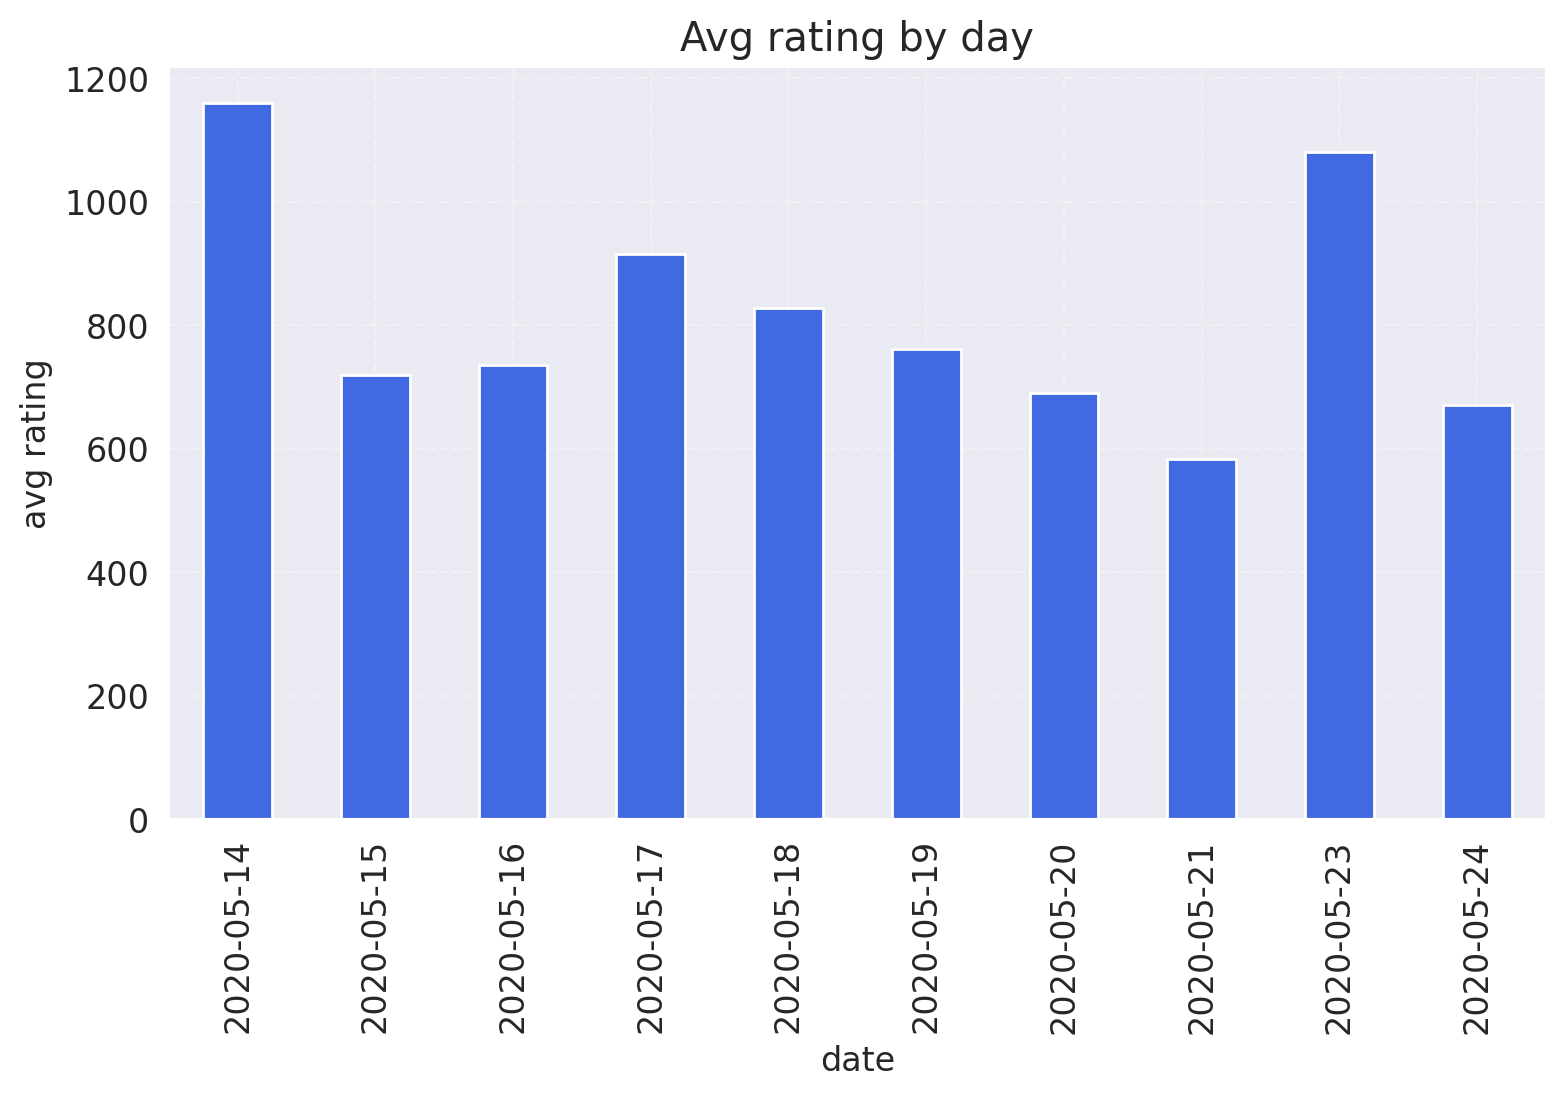

In [1083]:
# your code
data['date'] = pd.to_datetime(data['timestamp']).dt.date
day_avg_rating = data.groupby('date')['rating'].mean()

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.title('Avg rating by day')
plt.xlabel('date')
plt.ylabel('avg rating')
plt.xticks(rotation=45)
plt.tight_layout()
day_avg_rating.plot(kind='bar', color='royalblue')
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig('avg_rating_by_day.pdf', format='pdf') # хз, просто не нашел, куда сохраняет предложенная учителем команда да и расширение вроде не поменялось.
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

In [1084]:
# your code
plt.rcParams['savefig.format'] = 'pdf'
plt.savefig('avg_rating_by_day.pdf', format='pdf')

<Figure size 800x500 with 0 Axes>

### 2. Распределение студентов по курсам.

<span style="color:red">!!!ВНИМАТЕЛЬНО ИЗУЧИТЕ ТЕКСТ НИЖЕ!!!</span>.

<span style="color:orange">Если во время выполнения заданий у вас вознинут вопросы -- еще раз перечитайте текст целиком, скорее всего ответы уже содержатся в нем.</span>

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [1085]:
# oops, my bad
df = data

assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

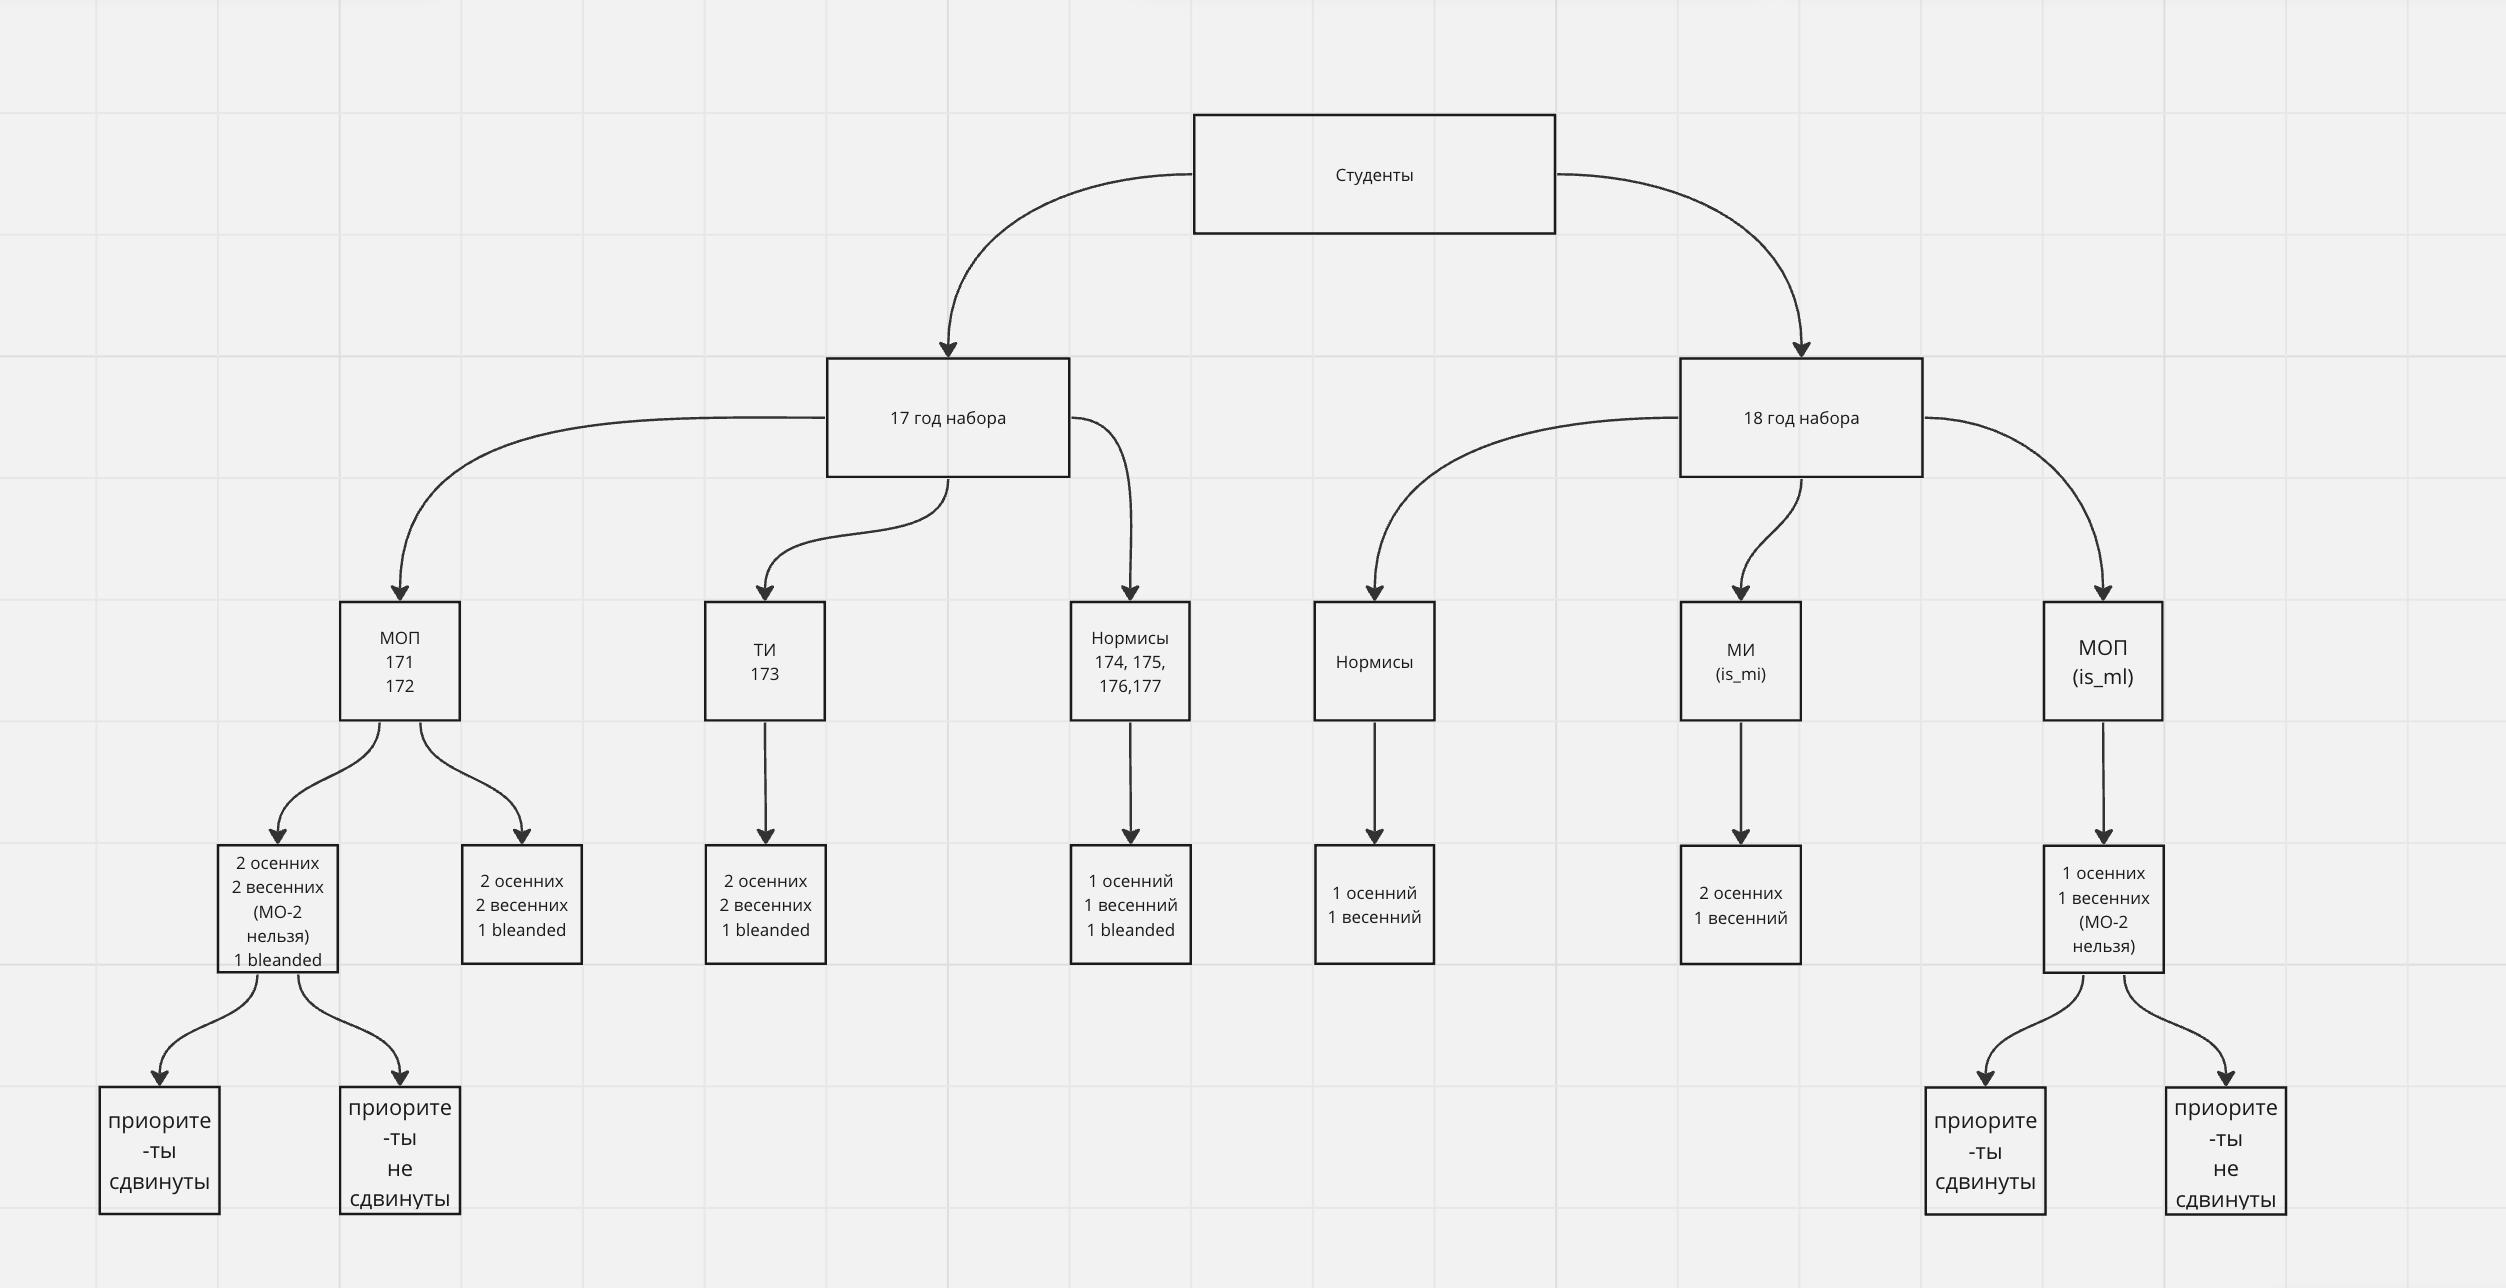

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [1086]:
# (￣^￣)ゞ
df['count_fall_crs'] = 1 # нормисы
df.loc[df['17_group'].isin([171, 172, 173]), 'count_fall_crs'] = 2 # МОП, ТИ
df.loc[(df['is_mi'] != 0), 'count_fall_crs'] = 2 # МИ

In [1087]:
# создадим словарик с курсами и местами на них
courses_dict = dict()
for column in ['fall_1', 'fall_2', 'fall_3']:
    unique_courses = df[column].unique()
    for course in unique_courses:
        courses_dict[course] = 30
courses_dict['Statistical Learning Theory'], courses_dict['Высокопроизводительные вычисления'], courses_dict['Анализ неструктурированных данных'] = 60, 60, 999999999

Проверка:

In [1088]:
col_name = 'count_fall_crs'    # insert your new column name as str

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [1089]:
# (￣^￣)ゞ
df1 = df[['id', 'percentile', 'fall_1']]
df1.rename(columns={'fall_1': 'fall'}, inplace=True)
df1['done'] = False

df2 = df[(df['count_fall_crs'] == 2) & (df['fall_1'] != df['fall_2'])][['id', 'percentile', 'fall_2']]
df2.rename(columns={'fall_2': 'fall'}, inplace=True)
df2['done'] = False

df1 = pd.concat([df1, df2])

In [1090]:
df1 = df1.sort_values(by='percentile', ascending=True)


for course in courses_dict:
    if courses_dict[course] > 0:
        df_current =  df1[df1['fall'] == course]
        df_current = df_current[:courses_dict[course]]
        ids = df_current['id']
        df1.loc[(df1['id'].isin(ids)) & (df1['fall'] == course), 'done'] = True
        # courses_dict[course] -= min(len(df_current['id']), courses_dict[course])

df1

,id,percentile,fall,done
231,3a7326c9e355a67d3805824ca34c4bc5,0.000000,Высокопроизводительные вычисления,True
80,3e106aaef8b24dbb01319c73e14c2936,0.000000,Безопасность компьютерных систем,True
231,3a7326c9e355a67d3805824ca34c4bc5,0.000000,Statistical Learning Theory,True
91,e0ca1a9548af9a3f98428c62420aa484,0.004484,Матричные вычисления,True
273,7fe7df0d207babbf30249b3063ac1f26,0.007246,Высокопроизводительные вычисления,True
...,...,...,...,...
359,79d14db48e4737af731960ae212d5134,0.985507,Принятие решений в условиях риска и неопределё...,True
170,40b18d40197e3db66312a026e06b8ff1,0.986547,Безопасность компьютерных систем,False
128,be4fa2120de3397ae21eac38ff0060e3,0.991031,Безопасность компьютерных систем,False
340,d539461bf254cf8b3201cdf7990b119e,0.992754,Анализ неструктурированных данных,True


Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [1091]:
!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('2_task_check.csv')

In [1092]:
from numpy import NaN
df1['is_first_place'], df1['is_last_place'] = NaN, NaN

for course in courses_dict:
    df_current =  df1[df1['fall'] == course]
    df_current = df_current[:courses_dict[course]]
    best = df_current['percentile'].idxmin()
    worst = df_current['percentile'].idxmax()
    df1.at[best, 'is_first_place'] = True
    df1.at[worst, 'is_last_place'] = True
    courses_dict[course] -= min(len(df_current['id']), courses_dict[course])

df1

,id,percentile,fall,done,is_first_place,is_last_place
231,3a7326c9e355a67d3805824ca34c4bc5,0.000000,Высокопроизводительные вычисления,True,True,NaN
80,3e106aaef8b24dbb01319c73e14c2936,0.000000,Безопасность компьютерных систем,True,True,NaN
231,3a7326c9e355a67d3805824ca34c4bc5,0.000000,Statistical Learning Theory,True,True,NaN
91,e0ca1a9548af9a3f98428c62420aa484,0.004484,Матричные вычисления,True,True,NaN
273,7fe7df0d207babbf30249b3063ac1f26,0.007246,Высокопроизводительные вычисления,True,NaN,NaN
...,...,...,...,...,...,...
359,79d14db48e4737af731960ae212d5134,0.985507,Принятие решений в условиях риска и неопределё...,True,NaN,NaN
170,40b18d40197e3db66312a026e06b8ff1,0.986547,Безопасность компьютерных систем,False,NaN,NaN
128,be4fa2120de3397ae21eac38ff0060e3,0.991031,Безопасность компьютерных систем,False,NaN,NaN
340,d539461bf254cf8b3201cdf7990b119e,0.992754,Анализ неструктурированных данных,True,NaN,True


In [1093]:
# переезжаем
unique_ids = df1.drop_duplicates(subset='id')
temp = unique_ids[['id', 'is_first_place', 'is_last_place']]
df = df.merge(temp, how='left', left_on='id', right_on='id')

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [1094]:
fir_col_name = 'is_first_place'      # insert name of your new column with is_first_place as str
last_col_name = 'is_last_place'     # insert name of your new column with is_last_place as str


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

In [1095]:
# (￣^￣)ゞ

df2 = df1[df1['done'] == False]
df2 = df2.drop_duplicates(subset='id')
temp = df[['id','fall_1', 'fall_2', 'fall_3', 'count_fall_crs']]
df2 = df2.merge(temp, how='left', left_on='id', right_on='id')
df2.loc[(df2['count_fall_crs'] == 1) & (df2['fall_2'] != df2['fall_1']), 'fall'] = df2['fall_2']
df2.loc[(df2['count_fall_crs'] == 2) & (df2['fall_1'] != df2['fall_3']) & (df2['fall_2'] != df2['fall_3']), 'fall'] = df2['fall_3']

df2

,id,percentile,fall,done,is_first_place,is_last_place,fall_1,fall_2,fall_3,count_fall_crs
0,081eba3952cfc116e0e9b941d6a974a2,0.215247,Матричные вычисления,False,NaN,NaN,Безопасность компьютерных систем,Матричные вычисления,Теория баз данных,1
1,d08d06bc5d31e35616fafc59de6f2e34,0.219731,Матричные вычисления,False,NaN,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,1
2,86eebda725013685effcb0c97591132e,0.224215,Язык SQL,False,NaN,NaN,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,1
3,7f9d0f835bf734ccd4619041c3475c1c,0.228700,Statistical Learning Theory,False,NaN,NaN,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,1
4,76d70b75a12f7b2ae593d02da6ed62ec,0.233184,Моделирование временных рядов,False,NaN,NaN,Безопасность компьютерных систем,Моделирование временных рядов,Сбор и обработка данных с помощью краудсорсинга,1
...,...,...,...,...,...,...,...,...,...,...
99,f2e1cfc27a724879ac2a8c98004c14b0,0.978261,Глубинное обучение в обработке звука,False,NaN,NaN,Принятие решений в условиях риска и неопределё...,Моделирование временных рядов,Глубинное обучение в обработке звука,2
100,f5d9f99cb876ca0888d18b6e444fa1b1,0.982063,Язык SQL,False,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,Теория баз данных,1
101,79d14db48e4737af731960ae212d5134,0.985507,Анализ неструктурированных данных,False,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,2
102,40b18d40197e3db66312a026e06b8ff1,0.986547,Язык SQL,False,NaN,NaN,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,1


In [1096]:
# запускаем вторую волну
df2 = df2.sort_values(by='percentile', ascending=True)

for course in courses_dict:
    if courses_dict[course] > 0:
        df_current =  df2[df2['fall'] == course]
        df_current = df_current[:courses_dict[course]]
        ids = df_current['id']
        df2.loc[(df2['id'].isin(ids)) & (df2['fall'] == course), 'done'] = True
        courses_dict[course] -= len(df_current['id'])

df2

,id,percentile,fall,done,is_first_place,is_last_place,fall_1,fall_2,fall_3,count_fall_crs
0,081eba3952cfc116e0e9b941d6a974a2,0.215247,Матричные вычисления,True,NaN,NaN,Безопасность компьютерных систем,Матричные вычисления,Теория баз данных,1
1,d08d06bc5d31e35616fafc59de6f2e34,0.219731,Матричные вычисления,True,NaN,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,1
2,86eebda725013685effcb0c97591132e,0.224215,Язык SQL,True,NaN,NaN,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,1
3,7f9d0f835bf734ccd4619041c3475c1c,0.228700,Statistical Learning Theory,True,NaN,NaN,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,1
4,76d70b75a12f7b2ae593d02da6ed62ec,0.233184,Моделирование временных рядов,False,NaN,NaN,Безопасность компьютерных систем,Моделирование временных рядов,Сбор и обработка данных с помощью краудсорсинга,1
...,...,...,...,...,...,...,...,...,...,...
99,f2e1cfc27a724879ac2a8c98004c14b0,0.978261,Глубинное обучение в обработке звука,True,NaN,NaN,Принятие решений в условиях риска и неопределё...,Моделирование временных рядов,Глубинное обучение в обработке звука,2
100,f5d9f99cb876ca0888d18b6e444fa1b1,0.982063,Язык SQL,False,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,Теория баз данных,1
101,79d14db48e4737af731960ae212d5134,0.985507,Анализ неструктурированных данных,True,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,2
102,40b18d40197e3db66312a026e06b8ff1,0.986547,Язык SQL,False,NaN,NaN,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,1


In [1097]:
df3 = df2[df2['done'] == False]
df3.loc[(df3['count_fall_crs'] == 1) & (df3['fall_2'] != df3['fall_1']) & (df3['fall_3'] != df3['fall_2']) & (df3['fall_1'] != df3['fall_3']), 'fall'] = df3['fall_3']

df3

,id,percentile,fall,done,is_first_place,is_last_place,fall_1,fall_2,fall_3,count_fall_crs
4,76d70b75a12f7b2ae593d02da6ed62ec,0.233184,Сбор и обработка данных с помощью краудсорсинга,False,NaN,NaN,Безопасность компьютерных систем,Моделирование временных рядов,Сбор и обработка данных с помощью краудсорсинга,1
6,cabc5ea85cac3029dc2aecc4955f9cf3,0.242152,Язык SQL,False,NaN,NaN,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,1
12,34f75b81eb7b1cc9e9e4ef5bfd7fa69a,0.278027,Высокопроизводительные вычисления,False,NaN,NaN,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,1
14,f0f6f3881894172a0f04e79b554b49e6,0.300448,Принятие решений в условиях риска и неопределё...,False,NaN,NaN,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,1
20,7bf79897c5645954846e2e03ec803887,0.399103,Сбор и обработка данных с помощью краудсорсинга,False,NaN,NaN,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,1
25,07b6ce7fd93bde95ce5fe14a5131a960,0.485507,Высокопроизводительные вычисления,False,NaN,NaN,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Высокопроизводительные вычисления,1
26,227347077a7d1d0544ddf5643b97cf8c,0.488789,Матричные вычисления,False,NaN,NaN,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,1
28,5ee2ad618729a6dc3bdb7f2858826ef0,0.513453,Теория баз данных,False,NaN,NaN,Безопасность компьютерных систем,Язык SQL,Теория баз данных,1
32,7fcf56aae6836855a689000a50e80360,0.536232,Безопасность компьютерных систем,False,NaN,NaN,Безопасность компьютерных систем,Безопасность компьютерных систем,Безопасность компьютерных систем,2
35,2b0d7dd550bcca4c586cbb27d8478aa8,0.560538,Матричные вычисления,False,NaN,NaN,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,1


In [1098]:
# запускаем третью волну
df3 = df3.sort_values(by='percentile', ascending=True)

for course in courses_dict:
    if courses_dict[course] > 0:
        df_current =  df3[df3['fall'] == course]
        df_current = df_current[:courses_dict[course]]
        ids = df_current['id']
        df3.loc[(df3['id'].isin(ids)) & (df3['fall'] == course), 'done'] = True
        courses_dict[course] -= len(df_current['id'])

df3

,id,percentile,fall,done,is_first_place,is_last_place,fall_1,fall_2,fall_3,count_fall_crs
4,76d70b75a12f7b2ae593d02da6ed62ec,0.233184,Сбор и обработка данных с помощью краудсорсинга,False,NaN,NaN,Безопасность компьютерных систем,Моделирование временных рядов,Сбор и обработка данных с помощью краудсорсинга,1
6,cabc5ea85cac3029dc2aecc4955f9cf3,0.242152,Язык SQL,False,NaN,NaN,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,1
12,34f75b81eb7b1cc9e9e4ef5bfd7fa69a,0.278027,Высокопроизводительные вычисления,False,NaN,NaN,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,1
14,f0f6f3881894172a0f04e79b554b49e6,0.300448,Принятие решений в условиях риска и неопределё...,True,NaN,NaN,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,1
20,7bf79897c5645954846e2e03ec803887,0.399103,Сбор и обработка данных с помощью краудсорсинга,False,NaN,NaN,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,1
25,07b6ce7fd93bde95ce5fe14a5131a960,0.485507,Высокопроизводительные вычисления,False,NaN,NaN,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Высокопроизводительные вычисления,1
26,227347077a7d1d0544ddf5643b97cf8c,0.488789,Матричные вычисления,True,NaN,NaN,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,1
28,5ee2ad618729a6dc3bdb7f2858826ef0,0.513453,Теория баз данных,True,NaN,NaN,Безопасность компьютерных систем,Язык SQL,Теория баз данных,1
32,7fcf56aae6836855a689000a50e80360,0.536232,Безопасность компьютерных систем,False,NaN,NaN,Безопасность компьютерных систем,Безопасность компьютерных систем,Безопасность компьютерных систем,2
35,2b0d7dd550bcca4c586cbb27d8478aa8,0.560538,Матричные вычисления,True,NaN,NaN,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,1


In [1099]:
# собираем в кучу
df1 = df1[df1['done'] == True][['id', 'fall']]
df2 = df2[df2['done'] == True][['id', 'fall']]
df3 = df3[df3['done'] == True][['id', 'fall']]
df_final = pd.concat([df1, df2, df3])
df_final

,id,fall
231,3a7326c9e355a67d3805824ca34c4bc5,Высокопроизводительные вычисления
80,3e106aaef8b24dbb01319c73e14c2936,Безопасность компьютерных систем
231,3a7326c9e355a67d3805824ca34c4bc5,Statistical Learning Theory
91,e0ca1a9548af9a3f98428c62420aa484,Матричные вычисления
273,7fe7df0d207babbf30249b3063ac1f26,Высокопроизводительные вычисления
...,...,...
77,5a6dfaade650ca8bb2d081342df303e8,Матричные вычисления
81,00b40fe7dbfd23e5daba765244509415,Матричные вычисления
82,aeb7bb1e047c392b7e5e39225cd86422,Анализ неструктурированных данных
89,86c24daaa62246142d46ee58534a65e0,Теория баз данных


In [1100]:
df_final['course_num'] = df_final.groupby('id').cumcount() + 1

temp_df = df_final.pivot_table(index='id', columns='course_num', values='fall', aggfunc='first').reset_index()
temp_df.columns = ['id'] + [f'course{i}' for i in range(1, temp_df.shape[1])]
temp_temp = df[['id', 'count_fall_crs']]
temp_df = temp_temp.merge(temp_df, how='left', left_on='id', right_on='id')
temp_df

,id,count_fall_crs,course1,course2
0,93ff79a51cd602f1dd3028ba2c129503,1,Язык SQL,NaN
1,26b01b1c4cd5656bab18d24c548834fb,1,Высокопроизводительные вычисления,NaN
2,30f3653fc176d54e89ac3179c455c6dd,1,Матричные вычисления,NaN
3,1528f0eaa027580820ccf0d92a53ad68,1,Statistical Learning Theory,NaN
4,496ea4f0d4abe264b1bb1b80eb3830c5,1,Высокопроизводительные вычисления,NaN
...,...,...,...,...
342,c5870b37ee3f672e4259dfb2fc02ed8f,1,Statistical Learning Theory,NaN
343,f44aea1095f9f5b8e2f5f0ed2b17891b,1,Анализ неструктурированных данных,NaN
344,d7118b44c7e8fdbbaaca226d2da6fef1,2,Statistical Learning Theory,Анализ неструктурированных данных
345,79d14db48e4737af731960ae212d5134,2,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных


In [1101]:
temp_df.loc[temp_df['count_fall_crs'] == 1, 'course2'] = '-'
temp_df.loc[(temp_df['count_fall_crs'] == 1) & (temp_df['course1'].isna()), 'course1'] = '???'
temp_df.loc[(temp_df['count_fall_crs'] == 2) & (temp_df['course1'].isna()), 'course1'] = '???'
temp_df.loc[(temp_df['count_fall_crs'] == 2) & (temp_df['course2'].isna()), 'course2'] = '???'
temp_df

,id,count_fall_crs,course1,course2
0,93ff79a51cd602f1dd3028ba2c129503,1,Язык SQL,-
1,26b01b1c4cd5656bab18d24c548834fb,1,Высокопроизводительные вычисления,-
2,30f3653fc176d54e89ac3179c455c6dd,1,Матричные вычисления,-
3,1528f0eaa027580820ccf0d92a53ad68,1,Statistical Learning Theory,-
4,496ea4f0d4abe264b1bb1b80eb3830c5,1,Высокопроизводительные вычисления,-
...,...,...,...,...
342,c5870b37ee3f672e4259dfb2fc02ed8f,1,Statistical Learning Theory,-
343,f44aea1095f9f5b8e2f5f0ed2b17891b,1,Анализ неструктурированных данных,-
344,d7118b44c7e8fdbbaaca226d2da6fef1,2,Statistical Learning Theory,Анализ неструктурированных данных
345,79d14db48e4737af731960ae212d5134,2,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных


In [1102]:
final_result = temp_df[['id', 'course1', 'course2']]
final_result.rename(columns={'id': 'ID'}, inplace=True)
final_result.to_csv('res_fall.csv', index=None)

**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/52663/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

[Ссылка на посылку](https://contest.yandex.ru/contest/52663/run-report/91845624/), ID посылки: 91845624

Никнейм - ainekrasov@edu.hse.ru
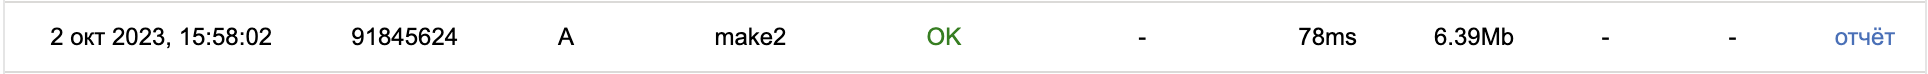

*Дисклеймер:*

Успешная посылка в контесте является **обязательным** условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

**Дополнительное задание. [2 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем.

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [1103]:
df = data

In [1104]:
# (￣^'￣)ゞ
df['count_spring_crs'] = 1 # нормисы
df.loc[df['17_group'].isin([171, 172, 173]), 'count_spring_crs'] = 2 # МОП, ТИ

In [1105]:
# создадим словарик с курсами и местами на них
courses_spring_dict = dict()
for column in ['spring_1', 'spring_2', 'spring_3']:
    unique_courses = df[column].unique()
    for course in unique_courses:
        courses_spring_dict[course] = 30
courses_spring_dict['Обучение с подкреплением'], courses_spring_dict['Анализ данных в бизнесе'] = 60, 60

In [1106]:
# (￣^￣)ゞ
df1_spring = df[['id', 'percentile', 'spring_1']]
df1_spring.rename(columns={'spring_1': 'spring'}, inplace=True)
df1_spring['done'] = False

df2_spring = df[(df['count_spring_crs'] == 2) & (df['spring_1'] != df['spring_2'])][['id', 'percentile', 'spring_2']]
df2_spring.rename(columns={'spring_2': 'spring'}, inplace=True)
df2_spring['done'] = False

df1_spring = pd.concat([df1_spring, df2_spring])

In [1107]:
df1_spring = df1_spring.sort_values(by='percentile', ascending=True)


for course in courses_spring_dict:
    if courses_spring_dict[course] > 0:
        df_current =  df1_spring[df1_spring['spring'] == course]
        df_current = df_current[:courses_spring_dict[course]]
        ids = df_current['id']
        df1_spring.loc[(df1_spring['id'].isin(ids)) & (df1_spring['spring'] == course), 'done'] = True
        # courses_dict[course] -= min(len(df_current['id']), courses_dict[course])

df1_spring

,id,percentile,spring,done
80,3e106aaef8b24dbb01319c73e14c2936,0.000000,Дискретная оптимизация,True
231,3a7326c9e355a67d3805824ca34c4bc5,0.000000,Численные методы,True
231,3a7326c9e355a67d3805824ca34c4bc5,0.000000,Символьные вычисления,True
91,e0ca1a9548af9a3f98428c62420aa484,0.004484,Дискретная оптимизация,True
273,7fe7df0d207babbf30249b3063ac1f26,0.007246,Проектирование и разработка высоконагруженных ...,True
...,...,...,...,...
359,79d14db48e4737af731960ae212d5134,0.985507,Методы сжатия и передачи медиаданных,True
170,40b18d40197e3db66312a026e06b8ff1,0.986547,Промышленное программирование на языке Java,False
128,be4fa2120de3397ae21eac38ff0060e3,0.991031,Промышленное программирование на языке Java,False
340,d539461bf254cf8b3201cdf7990b119e,0.992754,Обучение с подкреплением,False


In [1108]:
df2_spring = df1_spring[df1_spring['done'] == False]
df2_spring = df2_spring.drop_duplicates(subset='id')
temp_spring = df[['id','spring_1', 'spring_2', 'spring_3', 'count_spring_crs']]
df2_spring = df2_spring.merge(temp_spring, how='left', left_on='id', right_on='id')
df2_spring.loc[(df2_spring['count_spring_crs'] == 1) & (df2_spring['spring_2'] != df2_spring['spring_1']), 'spring'] = df2_spring['spring_2']
df2_spring.loc[(df2_spring['count_spring_crs'] == 2) & (df2_spring['spring_1'] != df2_spring['spring_3']) & (df2_spring['spring_2'] != df2_spring['spring_3']), 'spring'] = df2_spring['spring_3']

df2_spring

,id,percentile,spring,done,spring_1,spring_2,spring_3,count_spring_crs
0,d82c2df25b8b36cd655077b4a885e1f7,0.596413,Компьютерные сети,False,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,1
1,f941beb89ecc5c59076bcfa79691116c,0.605381,Анализ данных в бизнесе,False,Промышленное программирование на языке Java,Анализ данных в бизнесе,Системы баз данных,1
2,ddea5295ac96e74f05982e47c7ab4ff4,0.618834,Машинное обучение 2,False,Промышленное программирование на языке Java,Машинное обучение 2,Анализ данных в бизнесе,1
3,f0db08ec702a03450390efdca4166cc2,0.636771,Дискретная оптимизация,False,Промышленное программирование на языке Java,Дискретная оптимизация,Компьютерные сети,1
4,3e88c8d53bcd73595d2bbcdd8c51c1bf,0.637681,Обучение с подкреплением,False,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Обучение с подкреплением,2
...,...,...,...,...,...,...,...,...
62,f5d9f99cb876ca0888d18b6e444fa1b1,0.982063,Машинное обучение 2,False,Промышленное программирование на языке Java,Машинное обучение 2,Компьютерные сети,1
63,79d14db48e4737af731960ae212d5134,0.985507,Компьютерное зрение,False,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,2
64,40b18d40197e3db66312a026e06b8ff1,0.986547,Компьютерные сети,False,Промышленное программирование на языке Java,Компьютерные сети,Анализ данных в бизнесе,1
65,be4fa2120de3397ae21eac38ff0060e3,0.991031,Численные методы,False,Промышленное программирование на языке Java,Численные методы,Машинное обучение 2,1


In [1109]:
# запускаем вторую волну
df2_spring = df2_spring.sort_values(by='percentile', ascending=True)

for course in courses_spring_dict:
    if courses_spring_dict[course] > 0:
        df_current =  df2_spring[df2_spring['spring'] == course]
        df_current = df_current[:courses_spring_dict[course]]
        ids = df_current['id']
        df2_spring.loc[(df2_spring['id'].isin(ids)) & (df2_spring['spring'] == course), 'done'] = True
        courses_spring_dict[course] -= len(df_current['id'])

df2_spring

,id,percentile,spring,done,spring_1,spring_2,spring_3,count_spring_crs
0,d82c2df25b8b36cd655077b4a885e1f7,0.596413,Компьютерные сети,True,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,1
1,f941beb89ecc5c59076bcfa79691116c,0.605381,Анализ данных в бизнесе,True,Промышленное программирование на языке Java,Анализ данных в бизнесе,Системы баз данных,1
2,ddea5295ac96e74f05982e47c7ab4ff4,0.618834,Машинное обучение 2,True,Промышленное программирование на языке Java,Машинное обучение 2,Анализ данных в бизнесе,1
3,f0db08ec702a03450390efdca4166cc2,0.636771,Дискретная оптимизация,True,Промышленное программирование на языке Java,Дискретная оптимизация,Компьютерные сети,1
4,3e88c8d53bcd73595d2bbcdd8c51c1bf,0.637681,Обучение с подкреплением,True,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Обучение с подкреплением,2
...,...,...,...,...,...,...,...,...
62,f5d9f99cb876ca0888d18b6e444fa1b1,0.982063,Машинное обучение 2,True,Промышленное программирование на языке Java,Машинное обучение 2,Компьютерные сети,1
63,79d14db48e4737af731960ae212d5134,0.985507,Компьютерное зрение,True,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,2
64,40b18d40197e3db66312a026e06b8ff1,0.986547,Компьютерные сети,True,Промышленное программирование на языке Java,Компьютерные сети,Анализ данных в бизнесе,1
65,be4fa2120de3397ae21eac38ff0060e3,0.991031,Численные методы,True,Промышленное программирование на языке Java,Численные методы,Машинное обучение 2,1


In [1110]:
df3_spring = df2_spring[df2_spring['done'] == False]
df3_spring.loc[(df3_spring['count_spring_crs'] == 1) & (df3_spring['spring_2'] != df3_spring['spring_1']) & (df3_spring['spring_3'] != df3_spring['spring_2']) & (df3_spring['spring_1'] != df3_spring['spring_3']), 'spring'] = df3_spring['spring_3']

df3_spring

,id,percentile,spring,done,spring_1,spring_2,spring_3,count_spring_crs


В целом - да. Ничего нового я не сделал (а стоило бы, например, учитывать смещение приоритетов для студентов мопа, которые продолбались, посмотреть на bleanded курсы для четверокурсников и в целом внимательнее использовать наработки распределения осени для весны). Но мне не хочется, поэтому на этом все.

Как говорил ~JSON~ Джейсон Стэтхэм:

"Лучше что-то сделанное плохо, чем ничего, но сделаное хорошо."

**Отправьте свой файл res_spring.csv в контест (https://contest.yandex.ru/contest/52663/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

Вставьте картинку, описывающую ваш опыт выполнения этого задания:

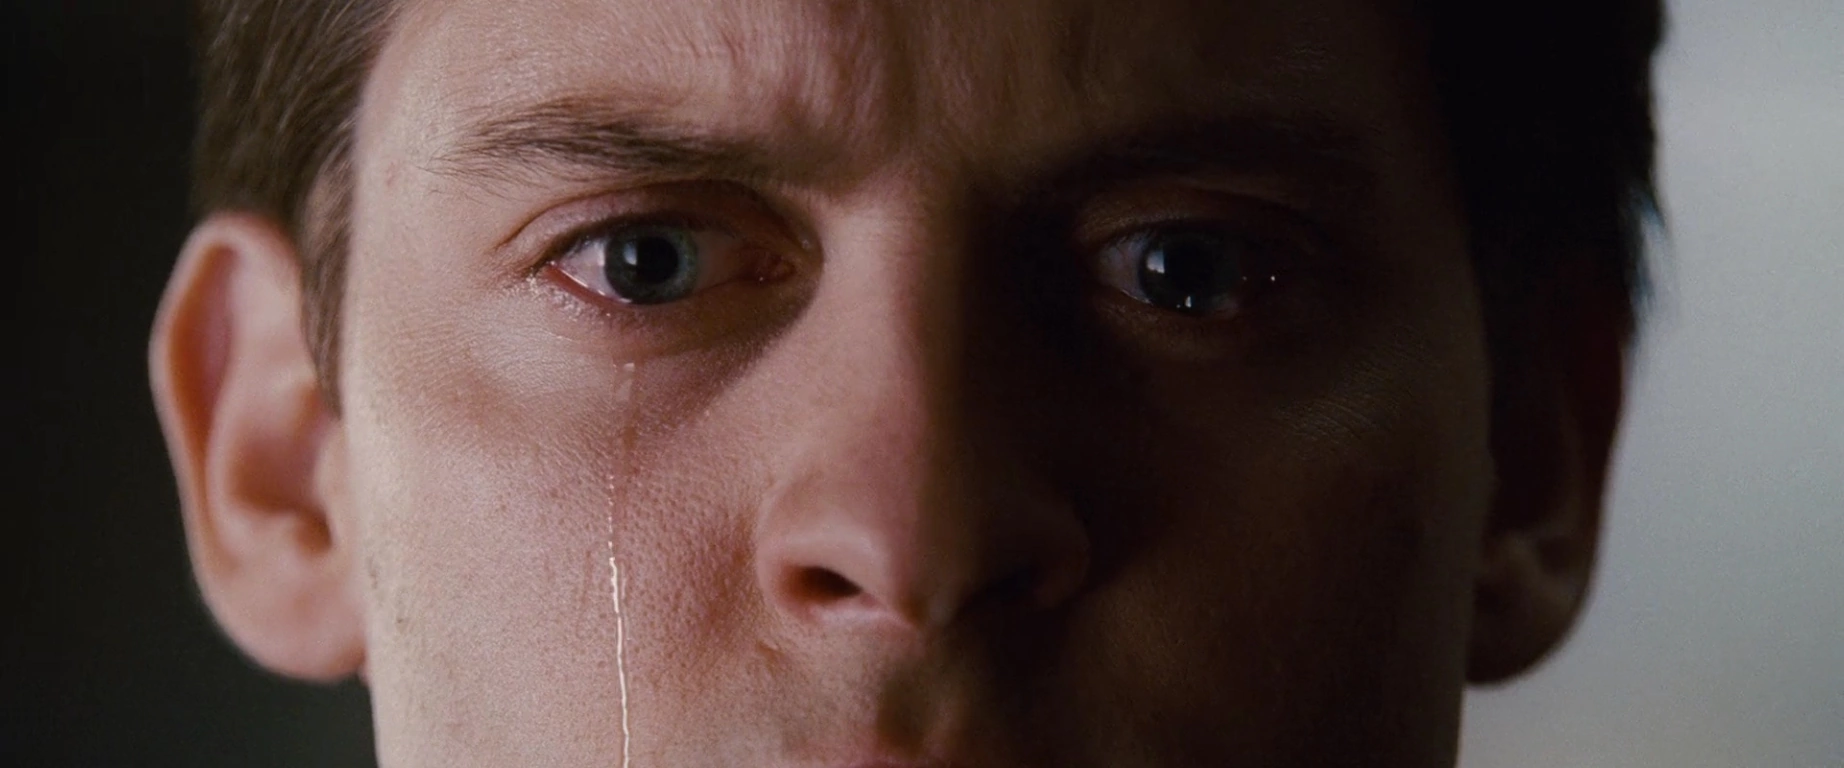